In [1]:
from image import Image

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, MaxPool2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

from tensorflow.python.client import device_lib
import tensorflow as tf

from sklearn.model_selection import train_test_split

C:\Users\Florian\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Load images and labels, split the train and test datasets

In [2]:
images, labels = Image.load_images("data", flatten=False)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, random_state=10, shuffle=True, test_size=.25)

#### Normalize the data and transform labels into categorical values

In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [9]:
dim_img = X_train.shape[1:]
num_classes = Y_test.shape[1]

#### Build the model

In [12]:
def CNN(dim_img, num_classes):
    model = Sequential()
    model.add(Conv2D(4, (3, 3), input_shape=dim_img, padding='same', activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(8, (3, 3), padding='same', activation='relu'))
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [25]:
#The model is fit over 10 epochs with updates every 100 images.

# build the model
model = CNN(dim_img, num_classes)
# Fit the model
hist = model.fit(X_train, Y_train, epochs=15, batch_size=150, validation_data=(X_test, Y_test), verbose=2)
#The test data is used as the validation dataset, allowing you to see the skill of the model as it trains.
#A verbose value of 2 is used to reduce the output to one line for each training epoch. 
#Finally, the test dataset is used to evaluate the model and a classification error rate is printed.

# Final evaluation of the model

scores = model.evaluate(X_test, Y_test, verbose=0)
print("Final accuracy: %.2f%%" % (scores[1]*100))
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 2250 samples, validate on 750 samples
Epoch 1/15
 - 38s - loss: 1.6872 - acc: 0.3293 - val_loss: 1.4725 - val_acc: 0.5653
Epoch 2/15
 - 2s - loss: 1.3534 - acc: 0.5147 - val_loss: 1.0906 - val_acc: 0.6653
Epoch 3/15
 - 2s - loss: 1.0555 - acc: 0.6187 - val_loss: 0.8028 - val_acc: 0.7453
Epoch 4/15
 - 2s - loss: 0.7941 - acc: 0.7182 - val_loss: 0.5974 - val_acc: 0.8027
Epoch 5/15
 - 2s - loss: 0.6185 - acc: 0.7827 - val_loss: 0.4637 - val_acc: 0.8707
Epoch 6/15
 - 2s - loss: 0.5258 - acc: 0.8222 - val_loss: 0.3742 - val_acc: 0.8773
Epoch 7/15
 - 2s - loss: 0.4386 - acc: 0.8524 - val_loss: 0.3024 - val_acc: 0.9133
Epoch 8/15
 - 3s - loss: 0.3772 - acc: 0.8676 - val_loss: 0.2444 - val_acc: 0.9387
Epoch 9/15
 - 3s - loss: 0.3311 - acc: 0.8907 - val_loss: 0.2192 - val_acc: 0.9413
Epoch 10/15
 - 2s - loss: 0.2976 - acc: 0.8924 - val_loss: 0.1925 - val_acc: 0.9547
Epoch 11/15
 - 3s - loss: 0.2521 - acc: 0.9169 - val_loss: 0.1657 - val_acc: 0.9587
Epoch 12/15
 - 3s - loss: 0.2146 - ac

#### Use the model for prediction on another data set

In [22]:
X_val, Y_val = Image.load_images("data_old", flatten=False)
X_val = X_val.astype('float32') / 255
Y_val = np_utils.to_categorical(Y_val)

In [27]:
Y_predict = model.predict(X_val)


In [28]:
accuracy = sum(Y_predict.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]
print("Accuracy with the 1st model : %.2f%%" % (accuracy*100))


Accuracy with the 1st model : 59.45%


#### Graphics

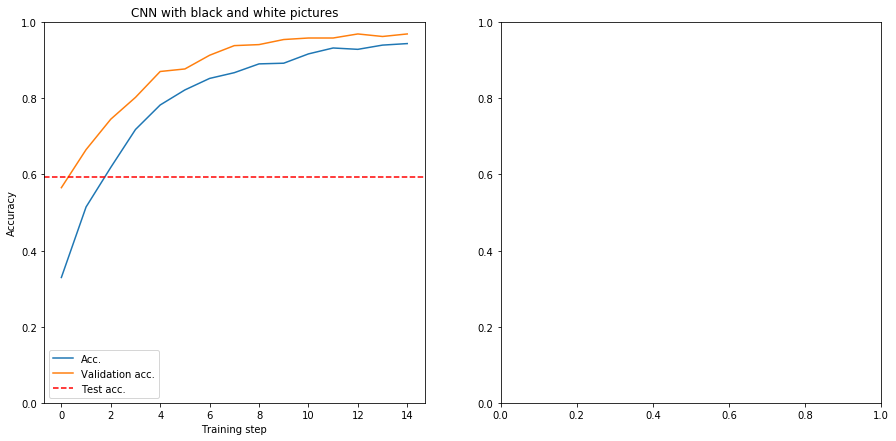

In [30]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(hist.history['acc'], label='Acc.')
ax1.plot(hist.history['val_acc'], label='Validation acc.')
ax1.axhline(accuracy, ls='--', c='r', label='Test acc.')
ax1.set_ylim([0,1])
ax1.set_xlabel('Training step')
ax1.set_ylabel('Accuracy')
ax1.set_title('CNN with black and white pictures')
ax1.legend()


plt.show()

In [16]:
X_val, Y_val = Image.load_images("data_old", flatten=False)
X_val = X_val.astype('float32') / 255
Y_val = np_utils.to_categorical(Y_val)

In [17]:
Y_predict = model.predict(X_val, batch_size=128)

In [18]:
sum(Y_predict.argmax(axis=1) == Y_val.argmax(axis=1)) / Y_val.shape[0]

0.41580756013745707